# Exploratory Analysis & Data Visualizations of Airbnb Listings in Bozeman, MT

**Amanda Wahlers**

Dataset: Bozeman, Montana, US; 10 August, 2023; downloaded from Inside Airbnb @ https://insideairbnb.com/get-the-data/

This is a streamlined, "production-ready" version of my exploratory analysis and data visualization code. 
The accompanying raw code file for exploratory analysis + price prediction, as well as a "production-ready" version of the price prediction model, can be found in the companion notebooks in this folder.

## Library Imports

In [3]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Goepandas for GIS
import geopandas as gpd

# Matplotlib for visualization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('white')

## Exploratory Analysis & Data Visualizations 

In [41]:
# Read in exploratory-analysis-ready dataset
listings = pd.read_csv('Data/expl_bt.csv')

### The most common Airbnb property type in Bozeman is an entire house (45%)

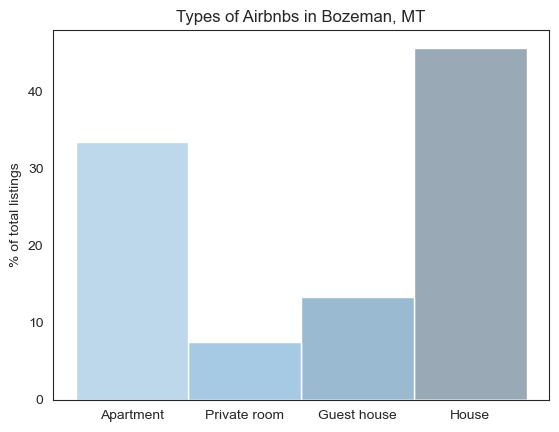

In [7]:
# Plot property types
sns.histplot(x='listing_type', data=listings, discrete=True, stat='percent', hue='listing_type', palette='Blues_d', legend=False)
plt.xticks(ticks=[0,1,2,3], labels=['Apartment', 'Private room', 'Guest house', 'House'])
plt.ylabel('% of total listings')
plt.xlabel('')
plt.title('Types of Airbnbs in Bozeman, MT')
plt.show()

### The most common amenity in Bozeman is wifi. Pools are the least common amenity. Only 25% of listings allow pets:

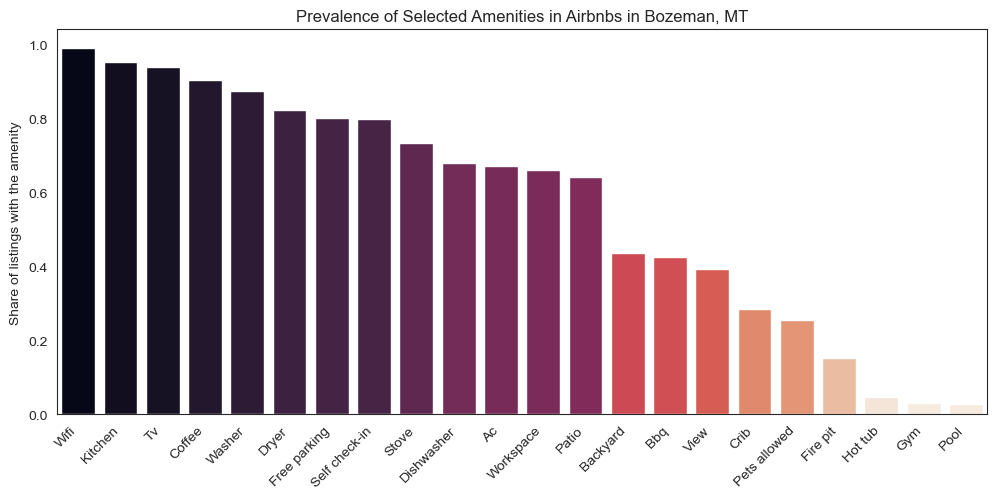

In [9]:
# Amenity indicators were created by extracting key words from a single string variable listed all of a listings' amenities

# Calculate percent allowing pets
listings['pets allowed'].mean()

# Store extracted amenity indicators in a list for plotting, get their means, & sort by value
amenities_list = listings[['wifi', 'kitchen', 'tv', 'coffee', 'washer', 'dryer', 
                      'backyard', 'ac', 'workspace','pets allowed', 'fire pit', 'bbq', 
                      'free parking', 'dishwasher', 'gym', 'self check-in', 'stove', 'view', 
                      'patio', 'crib', 'hot tub', 'pool']].mean().sort_values(ascending=False)
# Store the amenity names for labels, careful to do so in the order they'll appear & capitalize them
name_list = amenities_list[amenities_list > 0].index.tolist()
proper_names = [x.capitalize() for x in name_list]

# Set up the plotting grid
N = len(amenities_list)
ind = np.arange(N) 

# Plot
plt.figure(figsize=(12,5))
sns.barplot(y=amenities_list, x=ind, palette='rocket_r', hue=amenities_list, legend=False)
plt.xticks(ind, proper_names,rotation=45, ha='right')
plt.title('Prevalence of Selected Amenities in Airbnbs in Bozeman, MT')
plt.ylabel('Share of listings with the amenity')
plt.xlabel('')
plt.show()

### Price increases with # of bedrooms & # of bathrooms in the listing

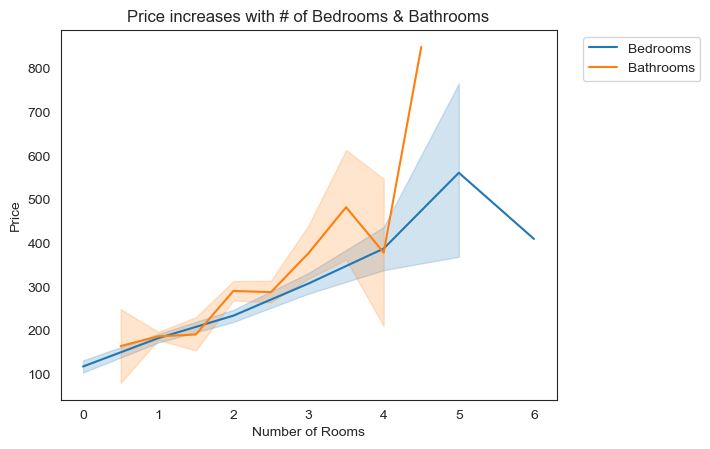

In [11]:
# Plot property types
sns.lineplot(x='bedrooms', data=listings, y='price', label='Bedrooms')
sns.lineplot(x='bathrooms', data=listings, y='price', label = 'Bathrooms')
plt.ylabel('Price')
plt.xlabel('Number of Rooms')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title('Price increases with # of Bedrooms & Bathrooms')
plt.show()

### Listings for houses have the highest average price, while private rooms have the lowest average price

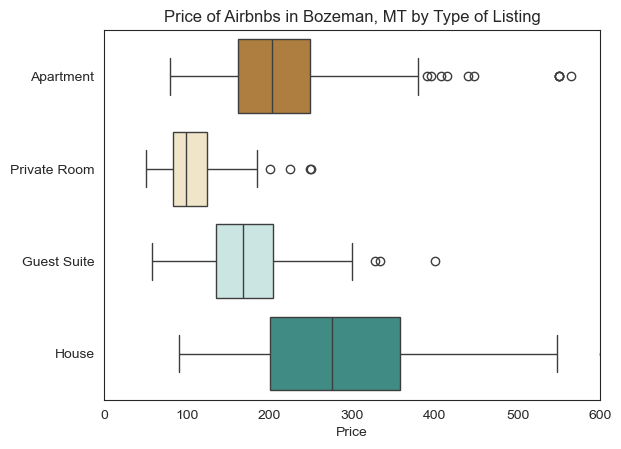

In [13]:
sns.boxplot(y='listing_type', x='price', data=listings, hue='listing_type', palette='BrBG')
plt.xlabel('Price')
plt.ylabel('')
plt.title('Price of Airbnbs in Bozeman, MT by Type of Listing')
plt.yticks([3,2,1,0],['House','Guest Suite', 'Private Room', 'Apartment'])
plt.xlim(0,600)
plt.show()

### Most properties have a minimum stay of 1-2 nights, while 15% *only* accept long stays of 28+ days

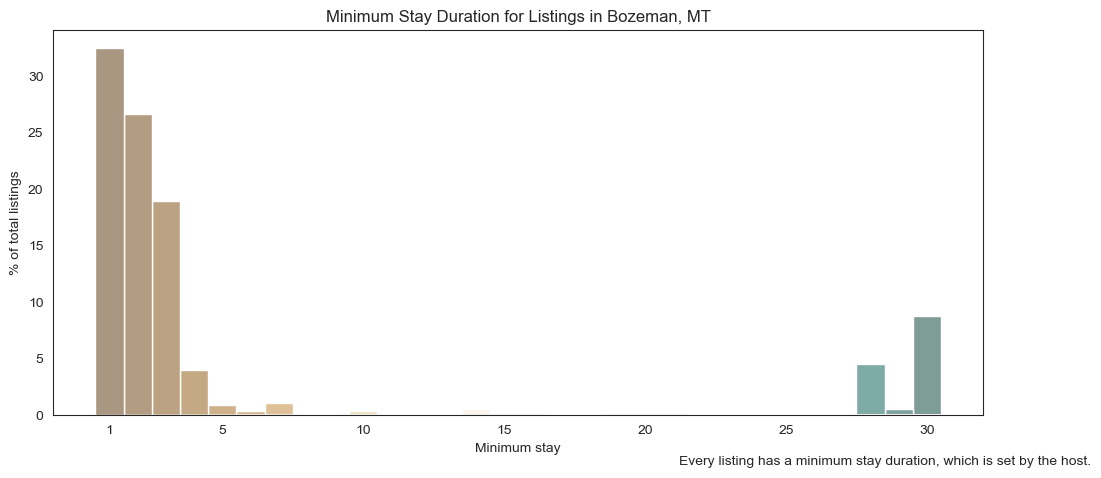

In [15]:
# Percent of listings that only accept stays 28+ days
listings.long_stays_only.mean()

# Pull out minimum stays between 1 & 30 days (otherwise the color palette will be skewed by outliers)
nights = listings[listings.minimum_minimum_nights < 31]

# Plot minimum stays
plt.figure(figsize=(12,5))
sns.histplot(x='minimum_minimum_nights', data=nights, discrete=True, 
             stat='percent', hue='minimum_minimum_nights', palette='BrBG', legend=False)
plt.xticks([1,5,10,15,20,25,30])
plt.ylabel('% of total listings')
plt.xlabel('Minimum stay')
plt.title('Minimum Stay Duration for Listings in Bozeman, MT')
plt.figtext(0.99, 0.01, 'Every listing has a minimum stay duration, which is set by the host.', horizontalalignment='right')  
plt.show()

In [16]:
# Create geo-dataframes of Bozeman + Airbnb locations

# Save labelled host # of listings for easy plotting
listings['three_cat']= listings['three_plus_listings'].astype(str)
listings.loc[listings.three_cat =='0', 'three_cat'] = '1-2 listings'
listings.loc[listings.three_cat == '1', 'three_cat'] = '3+ listings'

# Create geo-dataframe from Bozeman shapefile
city = gpd.read_file('Data/City_Limits/City_Limits.shp')
city_locs = gpd.GeoDataFrame(city)
city_locs = city_locs.to_crs(epsg=4326)
city_locs.head()

# Create geo-dataframe of Airbnb locations
airbnb_locs = gpd.GeoDataFrame(listings, 
                               geometry=gpd.points_from_xy(listings.longitude, listings.latitude)) 

### 55% of Airbnb listings in Bozeman are located downtown
Over half of the house, apartment, and guest suite Airbnb listings in Bozeman are located downtown. However, only 1/3 of the private rooms are located downtown.

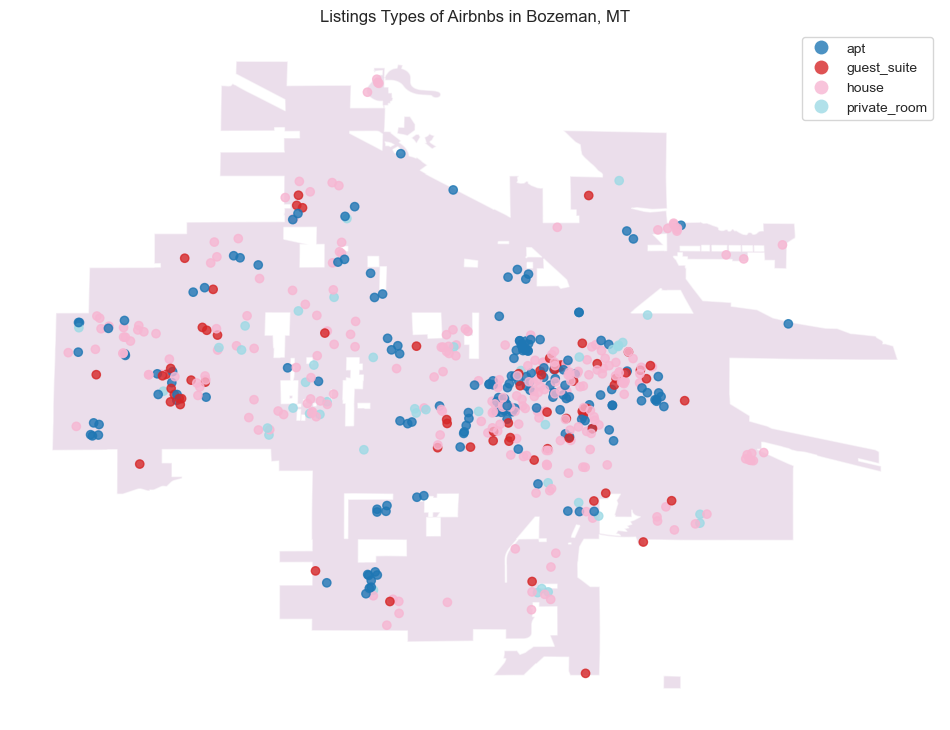

In [18]:
#Plot Airbnb locations on map of Bozeman, color by type

# Share of each listing type that is located downtown
listings.groupby('listing_type')['downtown'].mean()

#Initalize shared axis
fig, ax = plt.subplots(figsize =(12,12))
ax.axis('off')
ax.set_title('Listings Types of Airbnbs in Bozeman, MT')

#Plot map on axis
city_locs.plot(ax=ax, color='thistle', alpha=0.5)

#Plot locations of Airbnbs
airbnb_locs.plot(column=airbnb_locs.listing_type, ax=ax, cmap='tab20', alpha =0.8, legend=True)

plt.show()

### On average, listings located downtown have a higher price.

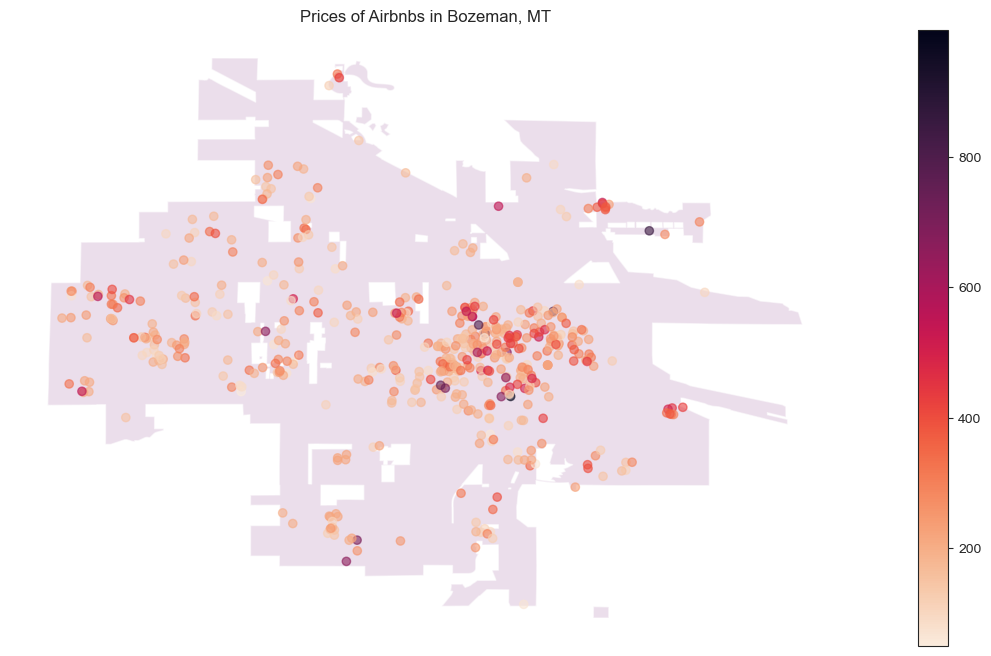

In [20]:
# Plot Airbnb locations on map of Bozeman, color by price

# Average price of listings donwtown versus not downtown
listings.groupby('downtown')['price'].mean()

#Initalize shared axis
fig, ax = plt.subplots(figsize =(20,8))
ax.axis('off')
ax.set_title('Prices of Airbnbs in Bozeman, MT')

#Plot map on axis
city_locs.plot(ax=ax, color='thistle', alpha=0.5)

#Plot locations of Airbnbs
airbnb_locs.plot(column=airbnb_locs.price, ax=ax, cmap='rocket_r', alpha =.6, legend=True)

plt.show()

### 1/3 of Airbnb listings in Bozeman are hosted by hosts with 3+ Airbnb properties in Bozeman.

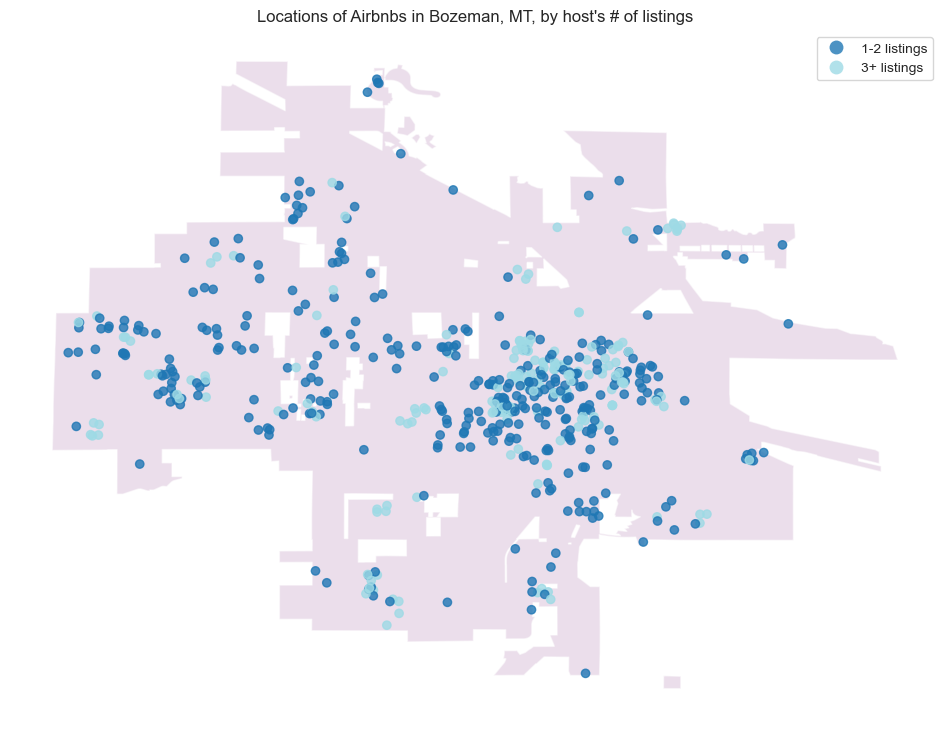

In [22]:
#Plot Airbnb locations on map of Bozeman, color by host having 3+ listings or not

# Share of listings by hosts with 3+ properties
listings.groupby('downtown')['three_plus_listings'].mean()

# Save labelled categories for easy plotting
listings['three_cat']= listings['three_plus_listings'].astype(str)
listings.loc[listings.three_cat =='0', 'three_cat'] = '1-2 listings'
listings.loc[listings.three_cat == '1', 'three_cat'] = '3+ listings'

#Initalize shared axis
fig, ax = plt.subplots(figsize =(12,12))
ax.axis('off')
ax.set_title('Locations of Airbnbs in Bozeman, MT, by host\'s # of listings')

#Plot map on axis
city_locs.plot(ax=ax, color='thistle', alpha=0.5)

#Plot locations of Airbnbs
airbnb_locs.plot(column=airbnb_locs.three_cat, ax=ax, cmap='tab20', alpha =.8, legend=True)
#ax.legend(labels=['1-2 listings', '3+ listings'])

plt.show()

### Listings for houses and listings with more bedrooms, beds, bathrooms, and max guests have a higher price. Listings that only accept long stays (28+ days), listings that are guest suites, and listings that are private rooms have a lower price.

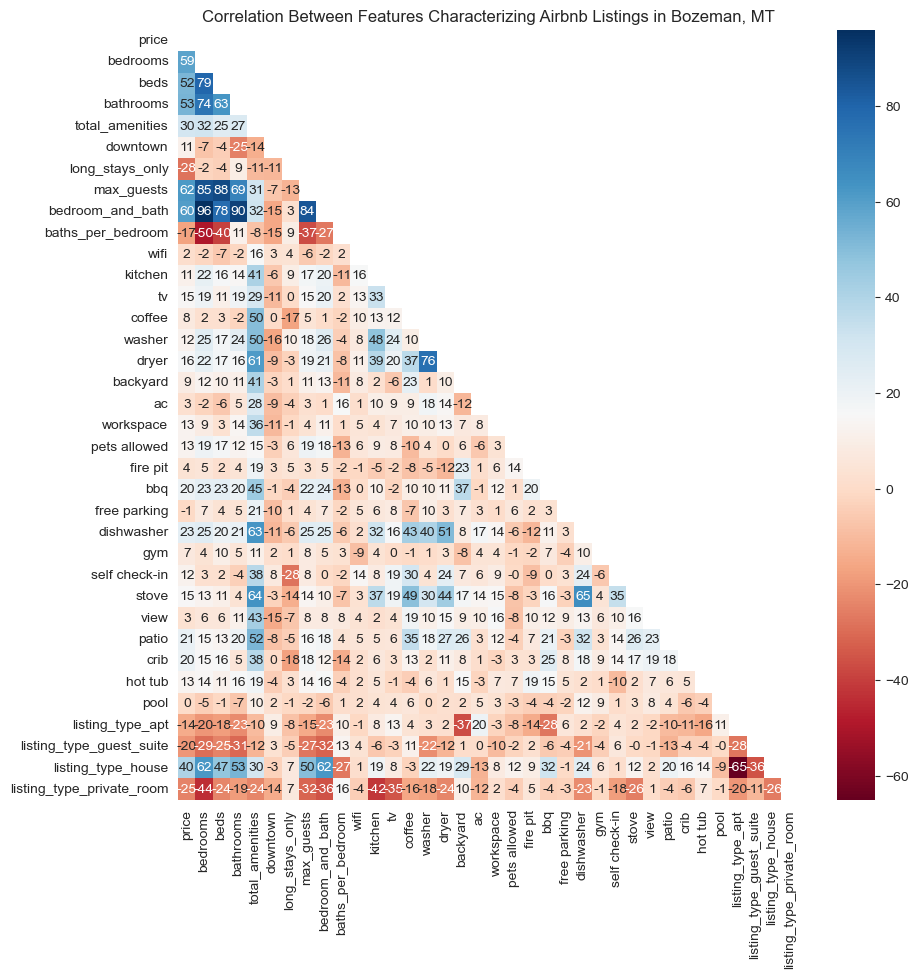

In [24]:
# Plot correlations between key numeric variables

# Create list of variables to correlate (we could do all of them, but there are a lot!)
features = listings[['price', 'bedrooms', 'beds', 'bathrooms', 'total_amenities', 'downtown',
                      'long_stays_only', 'max_guests', 'bedroom_and_bath',
                      'baths_per_bedroom','wifi', 'kitchen', 'tv', 'coffee', 'washer', 'dryer', 
                      'backyard', 'ac', 'workspace','pets allowed', 'fire pit', 'bbq', 
                      'free parking', 'dishwasher', 'gym', 'self check-in', 'stove', 'view', 
                      'patio', 'crib', 'hot tub', 'pool', 'listing_type_apt','listing_type_guest_suite', 
                     'listing_type_house','listing_type_private_room', ]].copy()

# Store top 20 strongest correlating variables
correlations = features.corr(numeric_only=True)

# Mask upper triangle
masks = np.zeros_like(correlations)
masks[np.triu_indices_from(masks)] = 1

# Plot
plt.figure(figsize=(10,10))
sns.heatmap(correlations*100, cmap='RdBu',mask=masks, annot=True, fmt='.0f')
plt.title('Correlation Between Features Characterizing Airbnb Listings in Bozeman, MT')
plt.show()